## Credit Card Fraud Detection Dataset 

The Credit Card Fraud Detection from Kaggle has been used in order to apply the theory of Deep learning using Big Data.

Data set is MB which is considered to be Big Data.

A Random Forest model and ANN algorith is going to be prepared to check their performance when usisng big data.

In [42]:
#pip install tensorflow 

In [43]:
#pip install keras

In [44]:
#Import the libraries
import matplotlib
matplotlib.use("TkAgg")
import pandas as pd
import seaborn as sns
import numpy as np
from keras.datasets import reuters
#from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from matplotlib import pyplot as plt 
%matplotlib inLine
sns.set(color_codes=True) 
import warnings
warnings.filterwarnings("ignore")


In [45]:
#load the dataset
Credit = pd.read_csv('Creditcard_2023.csv')

In [46]:
#Checking the first 5 rows
Credit.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [47]:
#Check the shape of the  data
Credit.shape

(568630, 31)

In [48]:
#Checking the types of variables
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [49]:
#checking categorical values on that dataset
#Credit.describe(include=object)

In [50]:
#checking the null values.
Credit.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [51]:
#Credit.isnull().values.any()

In [52]:
#Credit.isnull().sum()

In [53]:
#checking for unique values in dataset
Credit.nunique()

id        568630
V1        552035
V2        552035
V3        552035
V4        552035
V5        552035
V6        552035
V7        552035
V8        552035
V9        552035
V10       552035
V11       552035
V12       552035
V13       552035
V14       552035
V15       552035
V16       552035
V17       552035
V18       552035
V19       552035
V20       552035
V21       552035
V22       552035
V23       552035
V24       552035
V25       552035
V26       552035
V27       552035
V28       552035
Amount    506485
Class          2
dtype: int64

In [54]:
#Columns "ID" will be dropped as it will not produce any valuable information.

#Dropping feature.
Credit = Credit.drop(['id'], axis=1)

In [55]:
#Checking credit dataset head after dropping columns
Credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [56]:
#checking the duplicates in the dataset
duplicate_rows=Credit[Credit.duplicated()] 
print('number of duplicate rows: ', duplicate_rows.shape)

number of duplicate rows:  (1, 30)


In [57]:
# Used to count the number of rows before removing the data 
Credit.count() 

V1        568630
V2        568630
V3        568630
V4        568630
V5        568630
V6        568630
V7        568630
V8        568630
V9        568630
V10       568630
V11       568630
V12       568630
V13       568630
V14       568630
V15       568630
V16       568630
V17       568630
V18       568630
V19       568630
V20       568630
V21       568630
V22       568630
V23       568630
V24       568630
V25       568630
V26       568630
V27       568630
V28       568630
Amount    568630
Class     568630
dtype: int64

In [58]:
# Dropping the duplicates 
Credit = Credit.drop_duplicates() 
Credit.head(5) 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [59]:
#checking shape of data after removing duplicated rows
Credit.shape

(568629, 30)

In [60]:
# Visualizing the results of the test through a Boxplot:
#sns.set(rc={"figure.figsize":(4, 6)})
#sns.boxplot(data=Credit, x="Class", y="Amount")
#plt.title('Box plot of Target by Income',
          #fontsize=13)

In [61]:
# Number of transaction, Where "0" is legitimate transactions and "1" is fraud transactions
Credit["Class"].value_counts()

0    284315
1    284314
Name: Class, dtype: int64

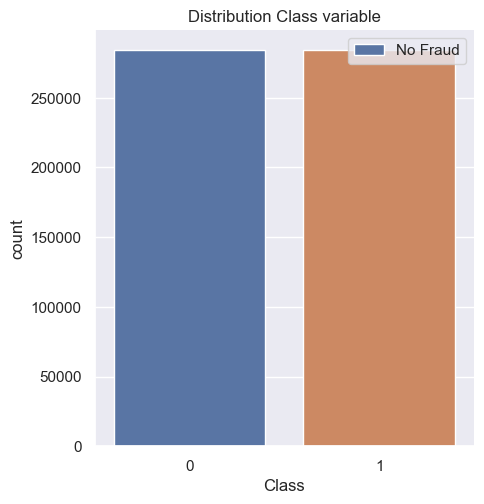

In [62]:
# Bar chart where it can be shown fraud and no fraud transaction. It is balance amount of transactions.
sns.catplot(x="Class", data=Credit, kind="count");
plt.title("Distribution Class variable")
plt.legend(["No Fraud", "Fraud"])

In [63]:
#Checking summary statistics on dataset
#When checking summary statisticis it is shown that there are outliers in the dataset.
Credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568629.000000,568629.000000,568629.000000,5.686290e+05,568629.000000,568629.000000,568629.000000,568629.000000,5.686290e+05,568629.000000,...,568629.000000,568629.000000,568629.000000,568629.000000,5.686290e+05,5.686290e+05,568629.000000,568629.000000,568629.000000,568629.000000
mean,0.000003,-0.000005,0.000002,-8.855104e-07,0.000002,-0.000006,0.000004,0.000011,-4.807863e-07,0.000001,...,-0.000014,0.000011,-0.000011,0.000002,-6.153061e-07,4.225269e-07,-0.000003,-0.000004,12041.939156,0.499999
std,0.999999,0.999996,1.000000,1.000002e+00,1.000001,0.999993,0.999997,0.999970,1.000002e+00,1.000001,...,0.999944,0.999965,0.999966,1.000001,1.000002e+00,1.000002e+00,1.000000,0.999998,6919.636504,0.500000
min,-3.495584,-49.966572,-3.183760,-4.951222e+00,-9.952786,-21.111108,-4.351839,-10.756342,-3.751919e+00,-3.163276,...,-19.382523,-7.734798,-30.295450,-4.067968,-1.361263e+01,-8.226969e+00,-10.498633,-39.035243,50.010000,0.000000
25%,-0.565285,-0.486680,-0.649298,-6.560208e-01,-0.293495,-0.445872,-0.283533,-0.192257,-5.687501e-01,-0.590101,...,-0.166441,-0.490486,-0.237629,-0.651580,-5.541491e-01,-6.318949e-01,-0.304961,-0.231878,6054.860000,0.000000
50%,-0.093636,-0.135894,0.000354,-7.376398e-02,0.081089,0.078716,0.233367,-0.114523,9.252585e-02,0.262617,...,-0.037431,-0.027327,-0.059689,0.015903,-8.193948e-03,-1.189070e-02,-0.172911,-0.013930,12030.130000,0.000000
75%,0.832658,0.343553,0.628539,7.070060e-01,0.439738,0.497788,0.525955,0.047299,5.592661e-01,0.592462,...,0.147976,0.463887,0.155715,0.700740,5.500149e-01,6.728885e-01,0.334021,0.409589,18036.330000,1.000000
max,2.229046,4.361865,14.125834,3.201536e+00,42.716891,26.168402,217.873038,5.958040,2.027006e+01,31.722709,...,8.087080,12.632511,31.707627,12.965639,1.462151e+01,5.623285e+00,113.231093,77.255937,24039.930000,1.000000


In [64]:
# Checking the correlation between variables
correlation = Credit.corr()
print(correlation)

              V1        V2        V3        V4        V5        V6        V7  \
V1      1.000000 -0.561181  0.484497 -0.498963  0.517461  0.354741  0.573378   
V2     -0.561181  1.000000 -0.627810  0.579639 -0.631669 -0.341060 -0.694018   
V3      0.484497 -0.627810  1.000000 -0.687726  0.510350  0.508986  0.634335   
V4     -0.498963  0.579639 -0.687726  1.000000 -0.429242 -0.474411 -0.588649   
V5      0.517461 -0.631669  0.510350 -0.429242  1.000000  0.245194  0.586828   
V6      0.354741 -0.341060  0.508986 -0.474411  0.245194  1.000000  0.418722   
V7      0.573378 -0.694018  0.634335 -0.588649  0.586828  0.418722  1.000000   
V8     -0.226783  0.191356 -0.263040  0.199024 -0.314996 -0.604482 -0.181017   
V9      0.548975 -0.585100  0.648616 -0.676649  0.479615  0.432243  0.601793   
V10     0.599107 -0.621799  0.707676 -0.712839  0.563874  0.471008  0.678005   
V11    -0.525796  0.558863 -0.688435  0.708642 -0.440099 -0.497622 -0.587659   
V12     0.580715 -0.574935  0.705496 -0.

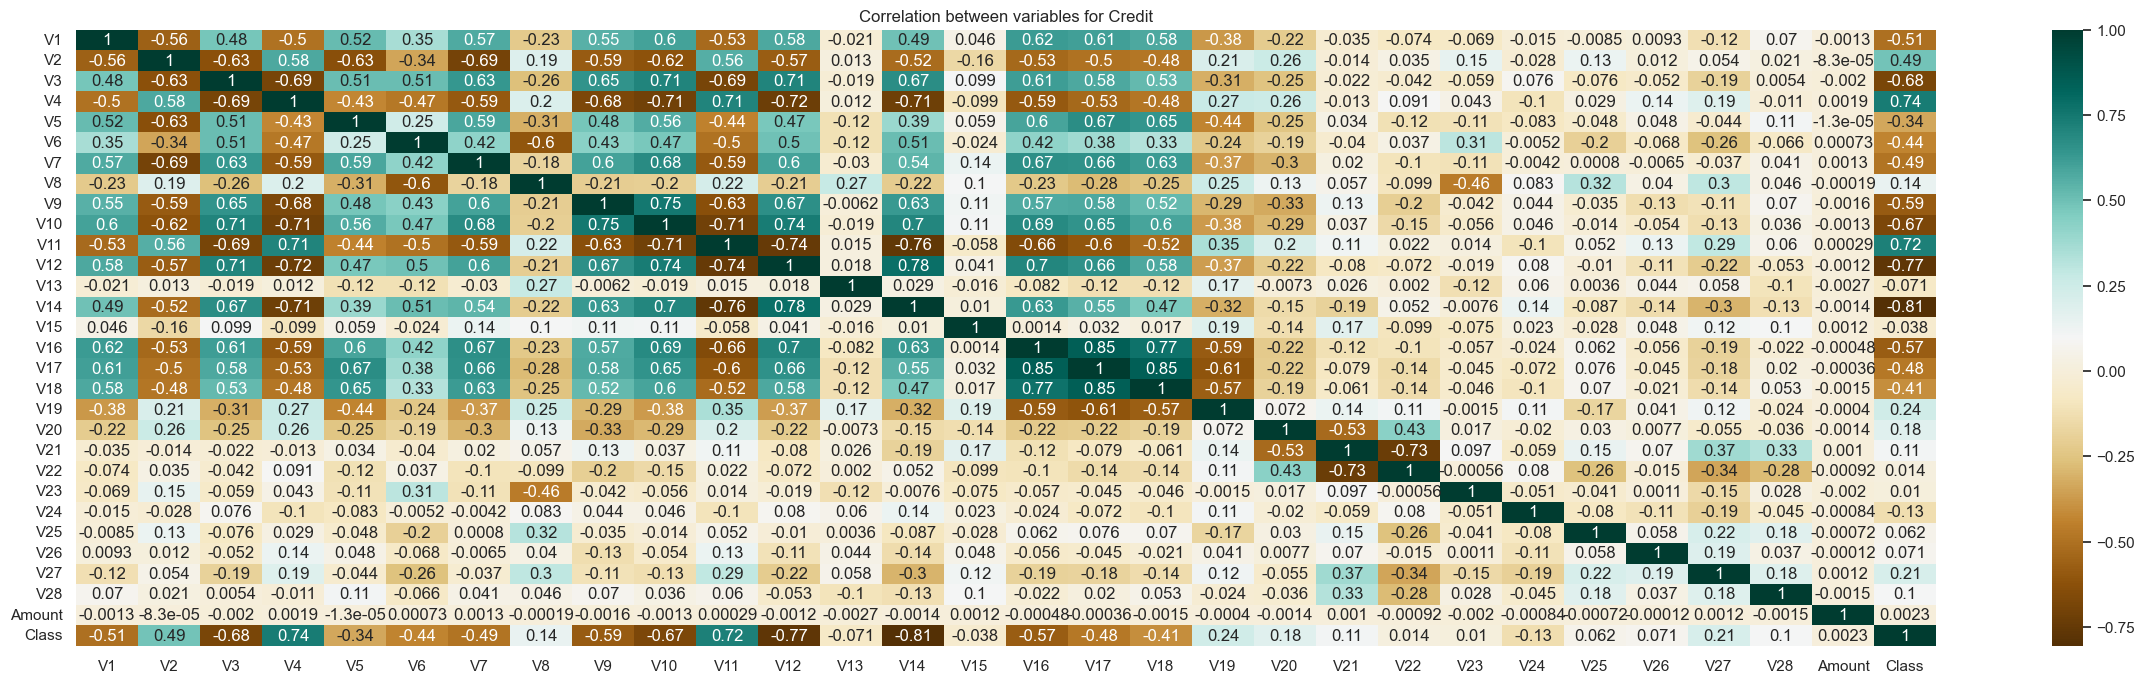

In [65]:
# Finding the relations between the variables through a heat map
plt.figure(figsize=(30,8)) 
c= Credit.corr() 
sns.heatmap(c,cmap="BrBG",annot=True) 
plt.title("Correlation between variables for Credit");
# There is a moderate correlation between V2 an Class variables. As well as that, there is a strong correlation of 0.71 between V12 and V3. 
# There is a strong correlation of 0.78 between V12 and V14. A moderate correlation between V1 and V14.   

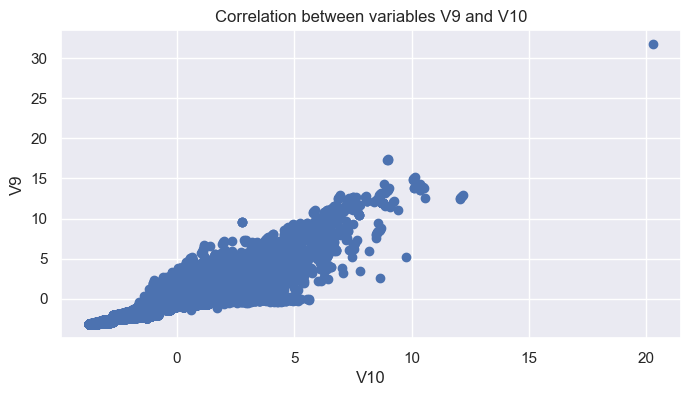

In [66]:
#Ploting a scatter plot to stablish if there is any correlation between two variables

fig, ax = plt.subplots(figsize=(8,4)) 
#sns.set_style('whitegrid')
ax.scatter(Credit['V9'], Credit['V10']) 
ax.set_xlabel('V10') 
ax.set_ylabel('V9') 
plt.title("Correlation between variables V9 and V10");
plt.show() 

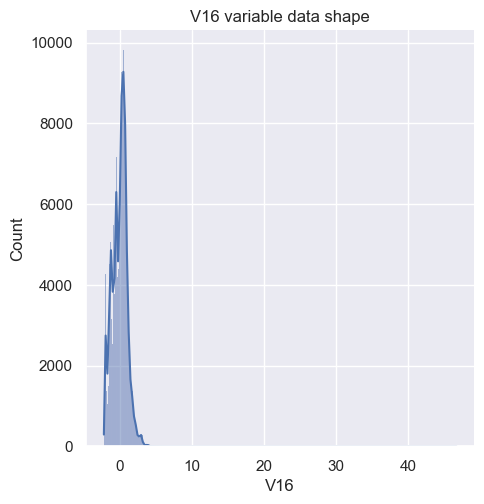

In [67]:
# Visualizing the Income variable
# It can be seen that data is positive skewed in this feature.
sns.set(rc={"figure.figsize":(3, 1)})
sns.displot(data=Credit, x="V16", kde=True);
plt.title("V16 variable data shape");

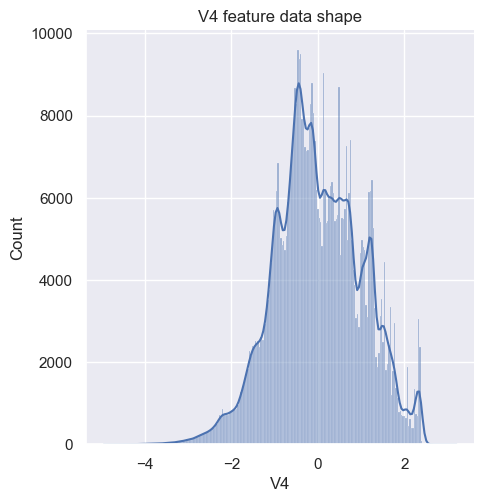

In [68]:
# Visualizing the Age variable
# It can be seen that data follow a normal distribution.
sns.set(rc={"figure.figsize":(4, 1)})
sns.displot(data=Credit, x="V4", kde=True);
plt.title("V4 feature data shape");

## Outliers detection

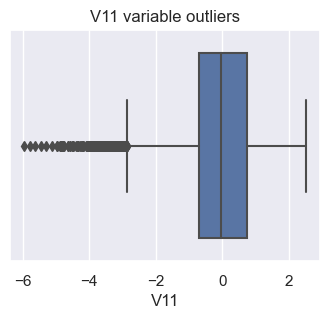

In [69]:
# Detecting Outliers
# As it can be seen below, there are ouliers in three of the numeric variables of my dataset.
sns.set(rc={"figure.figsize":(4, 3)})
sns.boxplot(x=Credit['V11']); 
plt.title("V11 variable outliers");

In [70]:
#Checking outliers in others variables
col_dict = {'V1':1 , 'V2':2 ,
        'V5':3 , 'V6': 4, 'V7':5, 'V8':6, 'V9':7, 'V10':8}

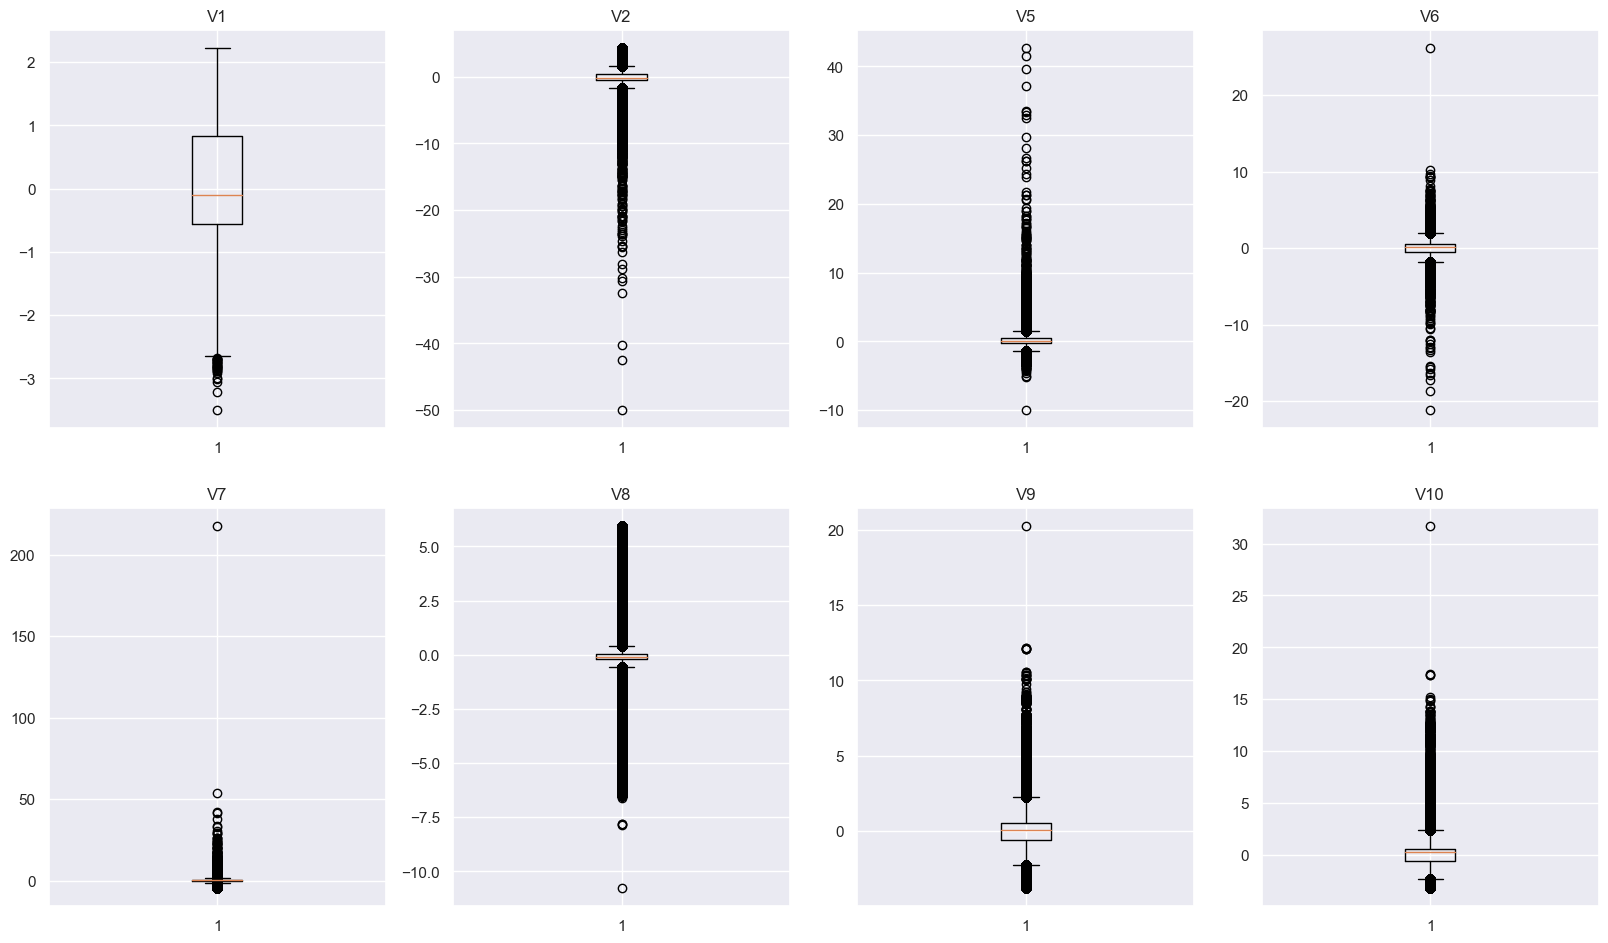

In [71]:
#Checking 8 variables to detect outliers in dataset
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(Credit[variable],whis=1.5)
                     plt.title(variable)

plt.show()

## Machine Learning section 

Deep learning models have been used since there are able to read complex patherns in the data and therefore make more accurate predictions that standard machine learning models. Thus, a ANN model will be performed on this dataset.

## **Data Preparation**

In [72]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568629 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568629 non-null  float64
 1   V2      568629 non-null  float64
 2   V3      568629 non-null  float64
 3   V4      568629 non-null  float64
 4   V5      568629 non-null  float64
 5   V6      568629 non-null  float64
 6   V7      568629 non-null  float64
 7   V8      568629 non-null  float64
 8   V9      568629 non-null  float64
 9   V10     568629 non-null  float64
 10  V11     568629 non-null  float64
 11  V12     568629 non-null  float64
 12  V13     568629 non-null  float64
 13  V14     568629 non-null  float64
 14  V15     568629 non-null  float64
 15  V16     568629 non-null  float64
 16  V17     568629 non-null  float64
 17  V18     568629 non-null  float64
 18  V19     568629 non-null  float64
 19  V20     568629 non-null  float64
 20  V21     568629 non-null  float64
 21  V22     56

In [73]:
# Standarization of dataset
#from sklearn import preprocessing
#Credit_scaled = preprocessing.scale(Credit)
#Credit_scaled = pd.DataFrame(Credit_scaled, columns=Credit.columns)
#Credit_scaled['Class'] = Credit['Class']
#Credit = Credit_scaled
#print(Credit.describe().loc[['mean', 'std','max'],].round(2).abs())

In [74]:
#from sklearn.model_selection import train_test_split
#X = Credit.loc[:, Credit.columns != 'Class']
#y = Credit.loc[:, 'Class']

In [75]:
# split into X and y
X = Credit.loc[:, ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10', 'V11', 'V12','V13', 'V14', 'V15','V16', 'V17', 'V18', 'V19']] # independent variables

y = Credit['Class']# dependent variables

In [76]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,-1.376970,1.789103
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,-0.664313,0.101604
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,-0.251679,-0.343196
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,0.930280,-0.481058


In [77]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 48)

In [78]:
## performing preprocessing part
from sklearn.preprocessing import StandardScaler

# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [79]:
y

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568629, dtype: int64

## Builiding an Artificial Neural Network model (ANN)

In [80]:
from keras.layers import Dense
from keras.models import Sequential

# Build neural network in Keras
model = Sequential()

# Add fully connected layer with a ReLU activation function
model.add(Dense(10, input_dim=19, activation='relu', )) # 29 columns, 10 columns

# Add fully connected layer with a ReLU activation function
model.add(Dense(5, activation='relu')) # 5 

# Add fully connected layer with a sigmoid activation function - Output layer
model.add(Dense(1, activation='sigmoid')) # output layer

In [81]:
#Checking summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                200       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 261 (1.02 KB)
Trainable params: 261 (1.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
# Compile neural network
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
model.fit(X_train, y_train, epochs=10, batch_size=100)#, verbose=False) 

Epoch 1/10
4550/4550 [==============================] - 11s 2ms/step - loss: 0.0994 - accuracy: 0.9626
Epoch 2/10
4550/4550 [==============================] - 11s 2ms/step - loss: 0.0504 - accuracy: 0.9813
Epoch 3/10
4550/4550 [==============================] - 11s 2ms/step - loss: 0.0403 - accuracy: 0.9848
Epoch 4/10
4550/4550 [==============================] - 11s 2ms/step - loss: 0.0352 - accuracy: 0.9874
Epoch 5/10
4550/4550 [==============================] - 10s 2ms/step - loss: 0.0320 - accuracy: 0.9888
Epoch 6/10
4550/4550 [==============================] - 10s 2ms/step - loss: 0.0296 - accuracy: 0.9896
Epoch 7/10
4550/4550 [==============================] - 10s 2ms/step - loss: 0.0284 - accuracy: 0.9902
Epoch 8/10
4550/4550 [==============================] - 11s 2ms/step - loss: 0.0277 - accuracy: 0.9905
Epoch 9/10
4550/4550 [==============================] - 11s 2ms/step - loss: 0.0271 - accuracy: 0.9908
Epoch 10/10
4550/4550 [==============================] - 11s 2ms/step - l

In [83]:
# Results - Accuracy
scores = model.evaluate(X_train, y_train) # verbose = False)
print("Training Accuracy: %.2f%%\n" % (scores[1] * 100))  #loss 

scores = model.evaluate(X_test, y_test) # verbose = False) loss 
print("Testing Accuracy: %.2f%%\n" % (scores[1] * 100)) #

14216/14216 [==============================] - 28s 2ms/step - loss: 0.0261 - accuracy: 0.9912
Training Accuracy: 99.12%

3554/3554 [==============================] - 8s 2ms/step - loss: 0.0271 - accuracy: 0.9910
Testing Accuracy: 99.10%



In [84]:
# Evaluating the predictions of the model
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_test_pred = model.predict(X_test)
y_test_pred = y_test_pred.flatten()
y_test_pred_new = np.where(y_test_pred.round(2) > 0.5, 1, 0)
c_matrix = confusion_matrix(y_test, y_test_pred_new)
c_matrix

3554/3554 [==============================] - 5s 1ms/step


array([[56372,   551],
       [  477, 56326]], dtype=int64)

3554/3554 [==============================] - 5s 1ms/step
ANN: 0.990951937112006
classification_report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99     56923
           1       0.99      0.99      0.99     56803

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

f1_score: 0.990949470073442
precision_score: 0.9901743654643886
recall_score: 0.9917257891308557


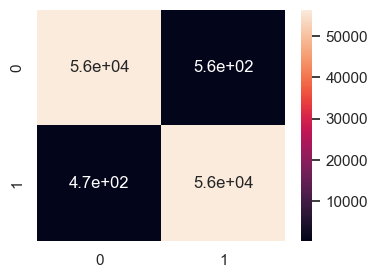

In [85]:
#from sklearn.metrics import confusion_matrix
import seaborn as sns
# Predicting the Test set results
y_pred = model.predict(X_test).flatten().round()

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
sns.heatmap(cm, annot=True)

#find accuracy
from sklearn.metrics import accuracy_score
print('ANN:',accuracy_score(y_test,y_pred))

# find classification report
from sklearn.metrics import f1_score , precision_score , recall_score , classification_report
print('classification_report:',classification_report(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))

**Discussion:** I had 142,158 number of transactions in my test set. Out of 68,661 were predicted to be legitimate transactions, and 3,067 were classified as being legitimate, when  there were not (type one error). It correctly predicted 68,116 transactions as being product of fraud and 2314 as being not legitimate ones, when they really are (type two error).

In [86]:
# Get training and test loss histories
history = model.fit(X_train, y_train, epochs=10, verbose=0, validation_data=(X_test, y_test))

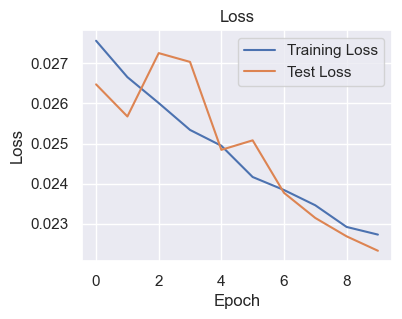

In [87]:
#Visualizing the loss in train set 
#plt.figure(figsize=(7,5))
plt.title('Loss') 
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test') 
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

**Alternatively, we can use the same approach to visualize the training and test accuracy over each epoch**

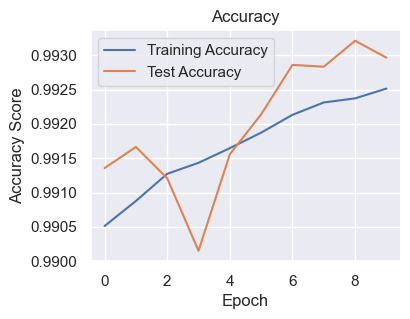

In [88]:
# plot accuracy during training 

plt.title('Accuracy') 
plt.plot(history.history['accuracy'], label='train') 
plt.plot(history.history['val_accuracy'], label='test') 
plt.legend(["Training Accuracy", "Test Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy Score")
plt.show() 


**Discussion:** After performing ANN with one hidden layer and one output layer, was able to make more accurate predictions in term of ilegal transactions.  

**References:**

https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023

McQuaid, D. (2023). Loss Functions – Advanced Data for Analytics Module. [Accessed 20 September, 2023].

Iqbal, M. (2022). Tutorial 6 ANN.  Case Study (Artificial Neural Network lecture). Machine Learning for Data Analytics module.[Accessed 20 September, 2023].
